In [5]:
%run init_notebook.py

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from settings import WORK_DATA_DIR
from utils.load import load_data
from utils.utils import get_variance_inflation_factor, is_day
from utils.plotting import cross_corr, df_cross_corr, corr_heatmap

In [76]:
# Load data
data_len = 8055 # 440, 660, 760, 1560, 8055
week_day = 'daily'
predicted = "sp_close_lead1"

df_w = load_data(file_name=f"df_{week_day}_{data_len}.csv", file_path=WORK_DATA_DIR)
data_dict = load_data(file_name=f"dict_{week_day}_{data_len}.pkl", file_path=WORK_DATA_DIR)

relevant_cols = data_dict["data"]["relevant_cols"]
data_dict["model_features"]["predicted"] = predicted

In [77]:
df_w["is_day"] = is_day(df_w.date)
df_w["year"] = df_w.date.apply(lambda x: dt.datetime.strptime(str(x), '%Y-%m-%d').year)

In [78]:
cols = [
    # 'vixo',
     # 'naaim_ind',
     # 'naaim_max',
     # 'naaim_q1',
     'ff_M_RF',
     'ff_SMB',
     'ff_HML',
     'ff_RMW',
     'ff_CMA',
     # 'termspread',
     # 'pc_ratio',
     # 'fears35',
     # 'aaii_Bullish',
     # 'aaii_Bearish',
     # 'aaii_Neutral',
     'sp_close',
     'sp_close_lag1',
     'sp_close_lag2',
     'sp_close_lag3',
     'sp_close_lag4',
     'sp_close_lag5',
     'sp_close_lag6',
     'sp_close_lag7',
     'sp_close_lag8',
     'sp_close_lag9',
     'sp_close_lag10',
     'is_day',
]


In [119]:
years_start = 2017
years_end = 2021
print(years_end - years_start)

4


In [120]:
# df_ws = df_w[cols + [data_dict["model_features"]["predicted"], 'date']].copy()
df_ws = df_w.copy()
df_ws = df_ws[(df_ws["date"] >= dt.datetime(year=years_start, month=1, day=1).date())
             &(df_ws["date"] <= dt.datetime(year=years_end, month=12, day=31).date())]

In [121]:
df_ws.shape

(1258, 39)

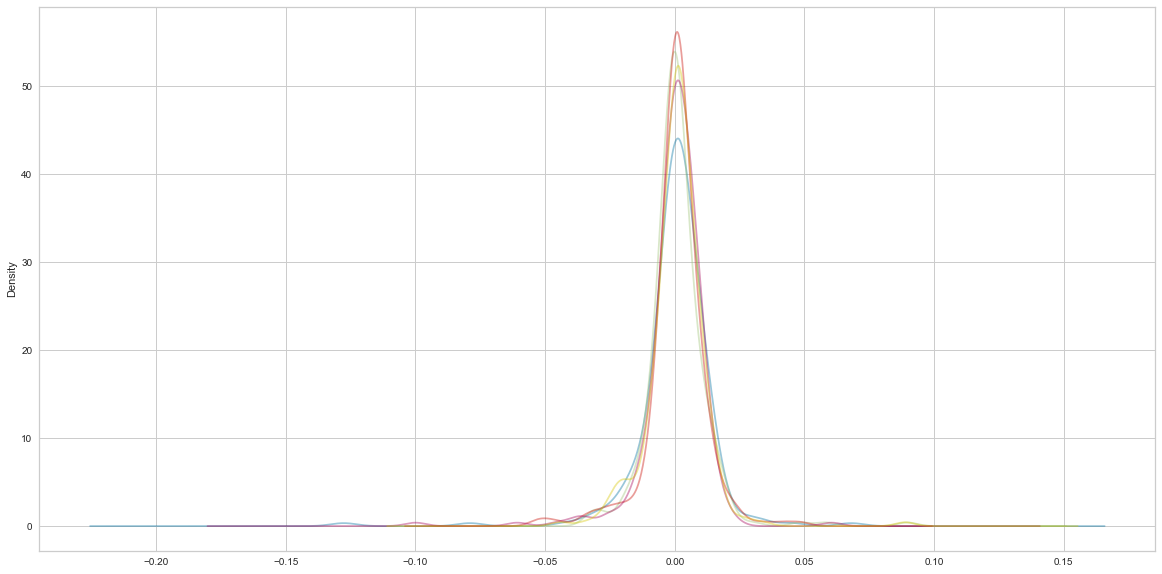

In [122]:
plt.figure(figsize=(20, 10))
df_ws.groupby('is_day')["sp_close"].plot.kde(alpha=.4);

year
2017    AxesSubplot(0.125,0.125;0.775x0.755)
2018    AxesSubplot(0.125,0.125;0.775x0.755)
2019    AxesSubplot(0.125,0.125;0.775x0.755)
2020    AxesSubplot(0.125,0.125;0.775x0.755)
2021    AxesSubplot(0.125,0.125;0.775x0.755)
Name: sp_close, dtype: object

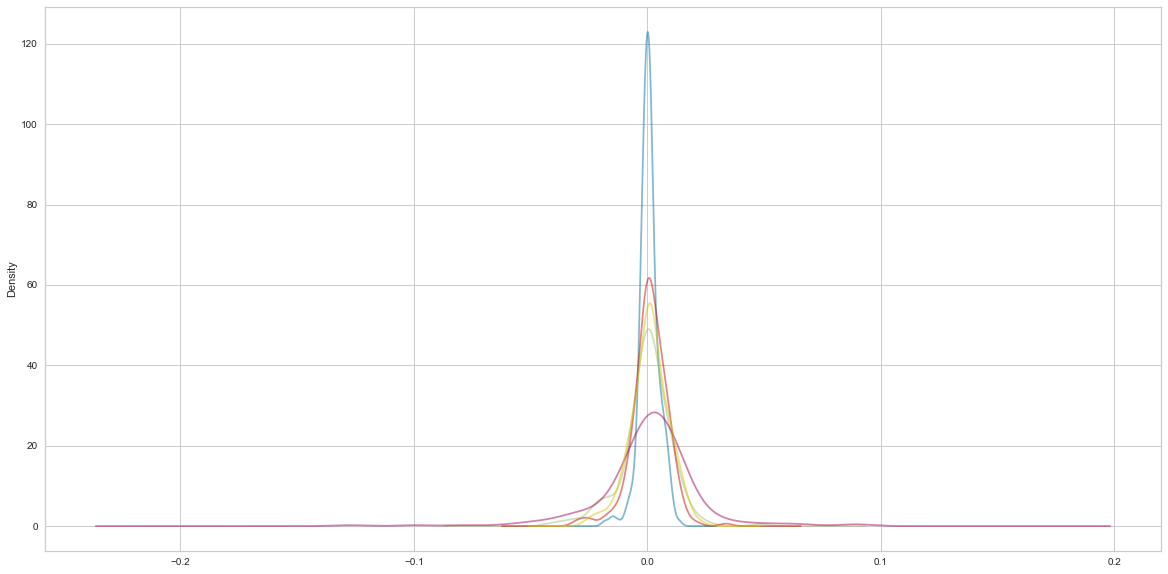

In [123]:
plt.figure(figsize=(20, 10))
df_ws.groupby("year").sp_close.plot.kde(alpha=.5)

,VIF,corr_sp_close_lead1
sp_close,307.203499,-0.240159
ff_M_RF,312.582416,-0.229668
sp_close_lag7,1.216003,-0.211350
sp_close_lag5,1.196092,-0.173666
sp_close_lag3,1.229703,-0.083093
sp_close_lag9,1.220660,-0.076993
ff_HML,2.233591,-0.038032
is_day,1.053599,-0.029191
sp_close_lag2,1.228082,-0.006754
sp_close_lag10,1.198630,0.000603


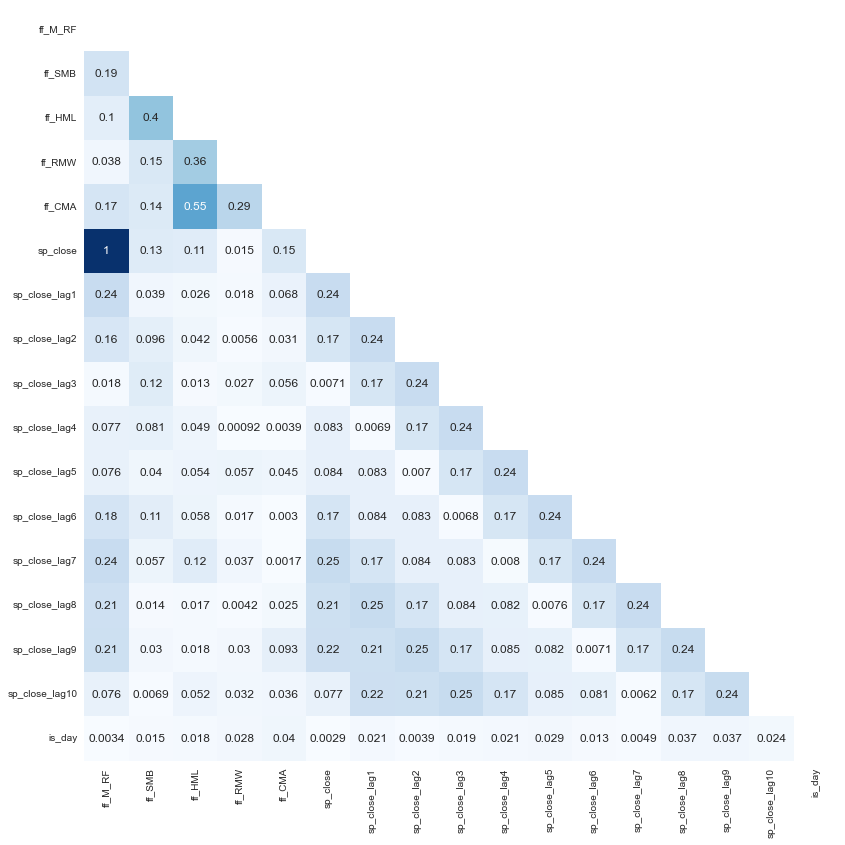

In [124]:
corr_heatmap(df_ws, 
             cols,
             # size_factor=1,
             show_fig=True)
get_variance_inflation_factor(df_ws, cols, col_pred=data_dict["model_features"]["predicted"])

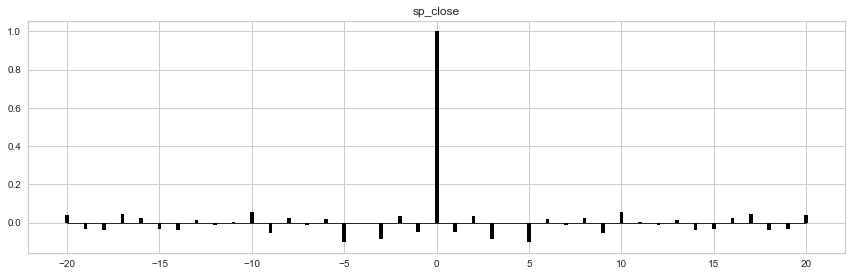

In [109]:
cross_corr(df_ws.sp_close, df_ws.sp_close, no_lags = 20, show_plot=True, figsize=(12, 4));

In [110]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [111]:
sd = seasonal_decompose(df_ws.sp_close, period=5)

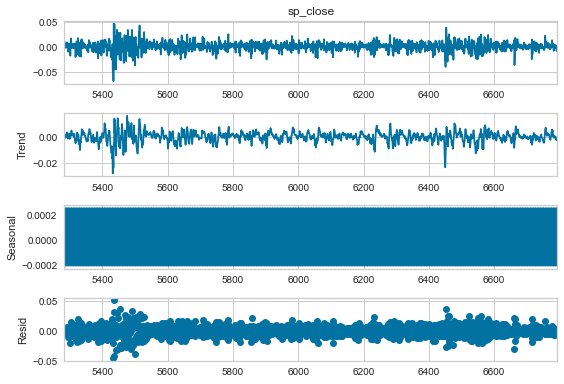

In [112]:
sd.plot()
plt.show()

<AxesSubplot:>

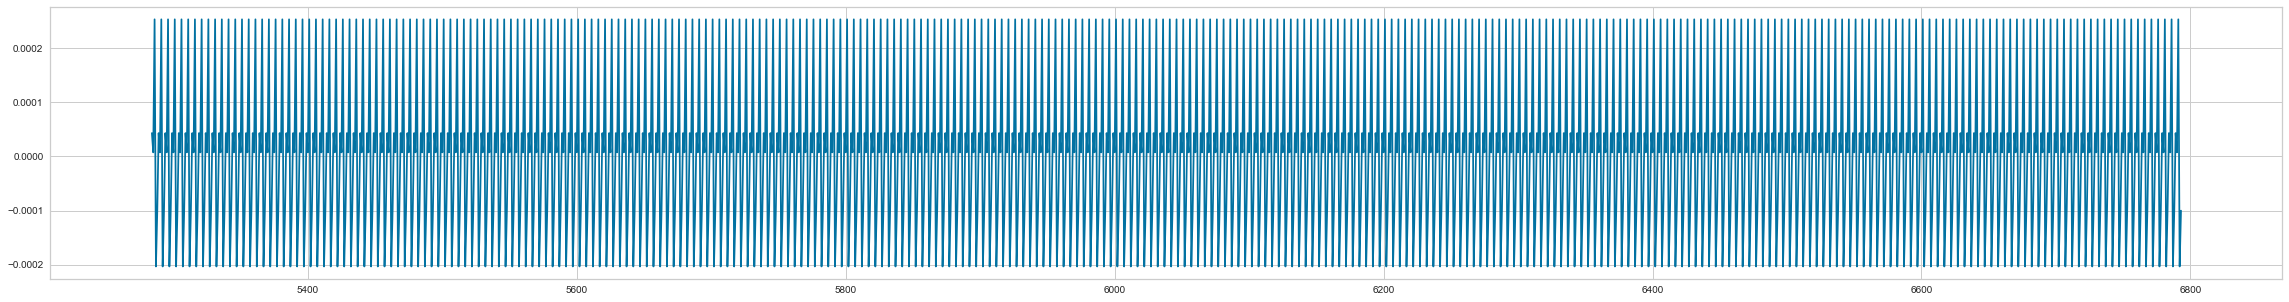

In [113]:
plt.figure(figsize=(40, 5))
sd.seasonal.plot()

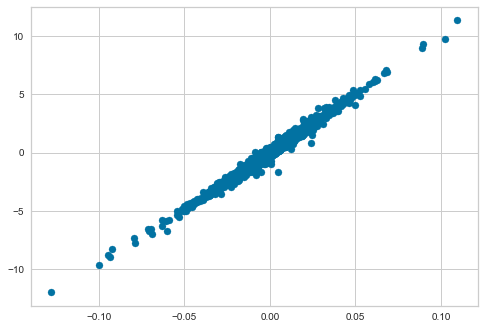

In [114]:
plt.scatter(df_w.sp_close, df_w.ff_M_RF)

In [115]:
X_ = df_w.pc_ratio

AttributeError: 'DataFrame' object has no attribute 'pc_ratio'

In [ ]:
X_.describe()

In [172]:
X_cut = pd.qcut(X_, q=10, duplicates='drop')

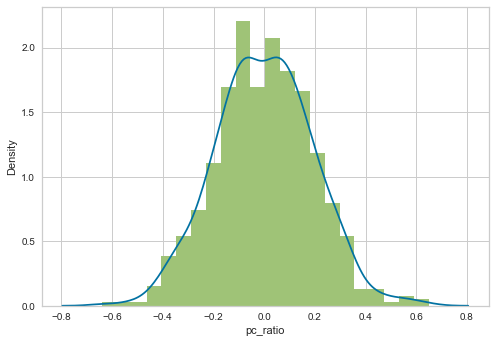

In [173]:
sns.kdeplot(X_)
plt.hist(X_, density=True, bins="fd");

In [176]:
X = X_ + X_.shift(1) + X.shift(2)
X = X_.rolling(3).mean()
X = X_
y = df_w[predicted]

In [177]:
print(f'dropping {X.isna().sum()} nans')
X = X.dropna()
y = y.loc[X.index]

dropping 0 nans


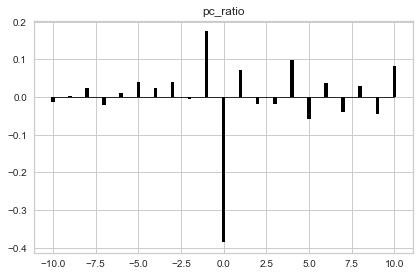

In [178]:
cross_corr(X, y, show_plot=True, figsize=(6, 4));

-0.3852191924720371

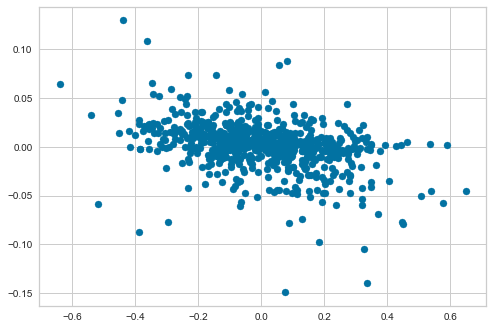

In [179]:
plt.scatter(X, y)
X.corr(y)

-0.7574676117759264


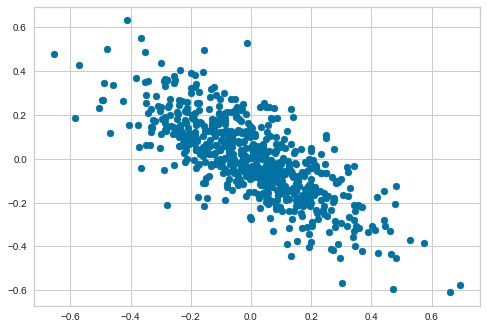

In [180]:
# plt.scatter(df_w["aaii_Bullish"], df_w[predicted])
plt.scatter(df_w["aaii_Bearish"], df_w['aaii_Bullish'])
print(df_w.aaii_Bearish.corr(df_w['aaii_Bullish']))